In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlb
import warnings
warnings.filterwarnings("ignore")

In [36]:
stock_data = pd.read_csv("../input/stock-market-data/Stock_Market_Data.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'],dayfirst=True)
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19


### 1. Create a line chart to visualize the 'Close' prices over time.

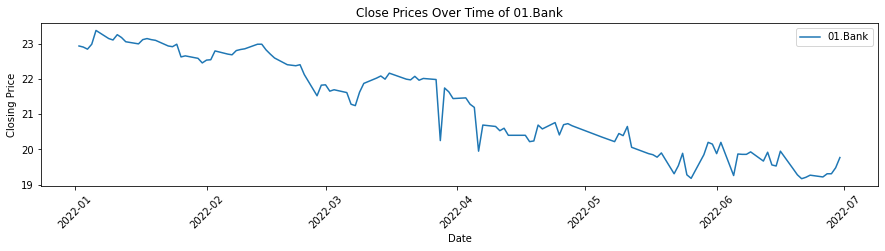

In [29]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
unique_names = stock_data['Name'].unique()
for name in unique_names:
    company_data = stock_data[stock_data['Name'] == name]
    plt.figure(figsize=(15, 3))
    plt.plot(company_data['Date'],company_data['Close'],label ="{}".format(name))
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Close Prices Over Time of {}'.format(name))
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    break

### 2.Calculate and plot the daily percentage change in closing prices.


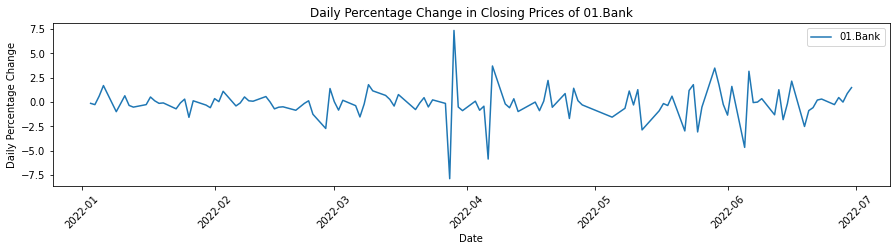

In [30]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
unique_names = stock_data['Name'].unique()
for name in unique_names:
    plt.figure(figsize=(15, 3))
    company_data = stock_data[stock_data['Name'] == name]
    company_data['Daily_PCT_Change'] = company_data['Close'].pct_change() * 100
    plt.plot(company_data['Date'], company_data['Daily_PCT_Change'], label=name)
    plt.xlabel('Date')
    plt.ylabel('Daily Percentage Change')
    plt.title('Daily Percentage Change in Closing Prices of {}'.format(name))
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    break


### 3.Investigate the presence of any trends or seasonality in the stock prices.

In [31]:
## will do

### 4.Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.

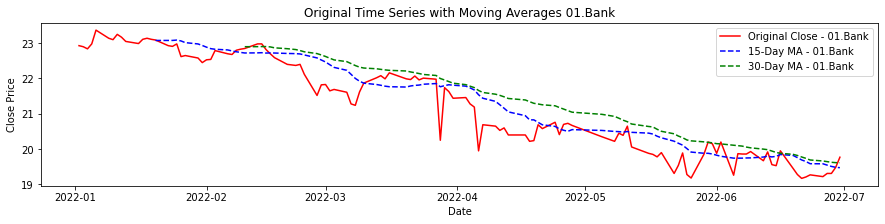

In [32]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
unique_names = stock_data['Name'].unique()
for name in unique_names:
    plt.figure(figsize=(15, 3))
    company_data = stock_data[stock_data['Name'] == name]
    company_data['15_Day_MA'] = company_data['Close'].rolling(window=15).mean()
    company_data['30_Day_MA'] = company_data['Close'].rolling(window=30).mean()

    # Plotting for the current company
    plt.plot(company_data['Date'], company_data['Close'], label=f'Original Close - {name}',color="red")
    plt.plot(company_data['Date'], company_data['15_Day_MA'], label=f'15-Day MA - {name}', linestyle='--',color="blue")
    plt.plot(company_data['Date'], company_data['30_Day_MA'], label=f'30-Day MA - {name}', linestyle='--',color="green")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Original Time Series with Moving Averages {}'.format(name))
    plt.legend()
    plt.show()
    break

### 5.Calculate the average closing price for each stock.

In [54]:
df = pd.DataFrame(stock_data.groupby('Name')['Close'].mean()).reset_index()
df.columns=['Name','AvgClosingPrice']
df.head()

,Name,AvgClosingPrice
0,01.Bank,21.260902
1,02.Cement,96.600820
2,03.Ceramics_Sector,71.225164
3,04.Engineering,132.352459
4,05.Financial_Institutions,29.253525
